### Challenge Description
We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site). 

Your project is to: Predict conversion rate 
Come up with recommendations for the product team and the marketing team to improve conversion rate Data

The table is "conversion_data". It has information about signed-in users during one session. Each row is a user session.

The data set contains the following columns:

Columns: 
- country : user country based on the IP address 
- age : user age. Self-reported at sign-in step 
- new_user : whether the user created the account during this session or had already an account and simply came back to the site source : marketing channel source 
- Ads: came to the site by clicking on an advertisement 
- Seo: came to the site by clicking on search results 
- Direct: came to the site by directly typing the URL on the browser 
- total_pages_visited: number of total pages visited during the session. 
- This is a proxy for time spent on site and engagement during the session. 
 converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything.

The company goal is to increase conversion rate: # conversions / total sessions.



### Import Libraries & Data Load

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("conversion_data.csv")
display ("Dataset has {} rows(samples) with {} columns(features) each.".format(*data.shape))

display(data.head(10))
data.describe()


'Dataset has 316200 rows(samples) with 6 columns(features) each.'

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


### Exploratory Data Analysis

In [3]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\kanja\Anaconda3\envs\py35\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\kanja\Anaconda3\envs\py35\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelapp.py", line

Number of variables,6
Number of observations,316200
Total Missing (%),0.0%
Total size in memory,14.5 MiB
Average record size in memory,48.0 B
Numeric,2
Categorical,2
Boolean,2
Date,0
Text (Unique),0
Rejected,0


Conversion rate at around 3% is industry standard. Th emax value for age is 123, which is not unusual. There are two number above hundred. To be on safe side, delete those two records with age above hundred.


In [4]:
sorted(data.age.unique())

[17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 77,
 79,
 111,
 123]

In [5]:
data[data.age>79]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


It is just 2 users out of 316k users. If we remove them, there will be no impact. It is not impossible but chances of age higher than 100 is so rare and it is safer to remove them. 
TODO: 
Wrong data is worrisome and can be an indicator of
some bug in the logging code. It will be wise to reach out to the team maintaining the datasource.

In [6]:
data = data[data.age<=79]


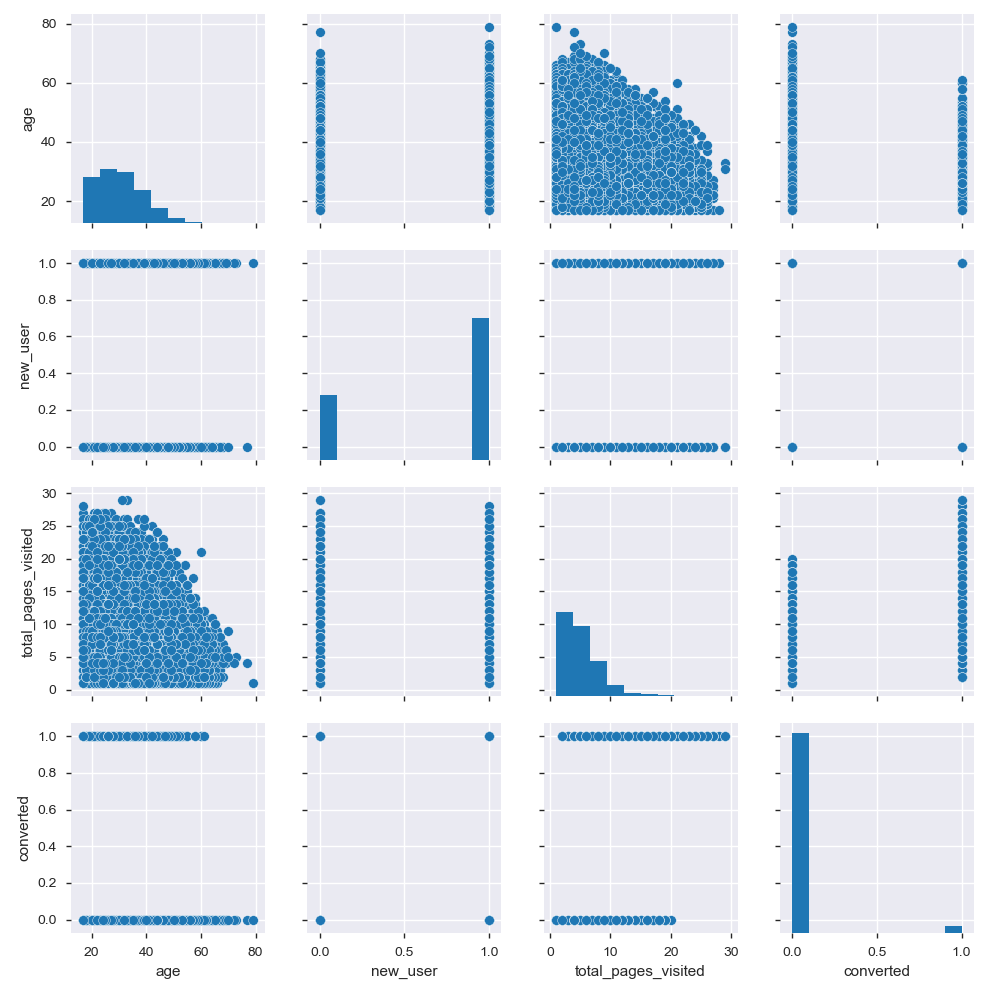

In [7]:
sns.pairplot(data)

total_pages_visited by converted chart implies spending more time on the site implies higher probability of conversion!

Text(0.5,1,'conversion_rates')

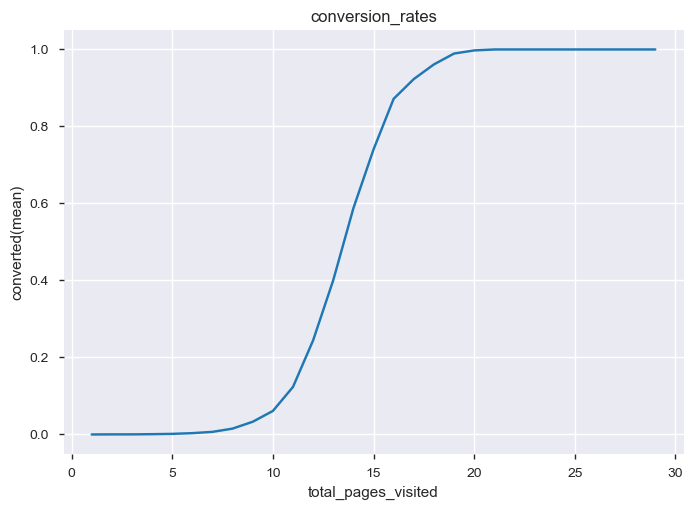

In [8]:
data_pages = data[["total_pages_visited", "converted"]].groupby("total_pages_visited", as_index=False).mean()
plt.plot(data_pages["total_pages_visited"], data_pages["converted"])
plt.xlabel("total_pages_visited")
plt.ylabel("converted(mean)")
plt.title("conversion_rates")

### Model Implmentation
Task is conversion prediction. So outcome is binary, hence a classification technique needs to be used.

- Logistic regression
- Decision Trees
- RuleFit (this is often your best choice)
- Random Forest in combination with partial dependence plots

I pick a random forest cause: it is an ensemble model that usually requires very little time to optimize it (its default params are often close to the best ones) and it is strong with outliers, irrelevant variables, continuous and discrete variables. I will use the random forest to predict conversion, then I will use variable importance to get insights on important features and then run the model with the important features only. Also, I will build a simple tree to find the most obvious user segments and see if they agree with RF partial dependence plots.
Firstly, “Converted” sand new_user are converted into binary variables. 

In [9]:
data = pd.get_dummies(data, prefix=['new_user','country','source'], columns=['new_user','country','source'])
data.head()

,age,total_pages_visited,converted,new_user_0,new_user_1,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,0,0,1,0,0,1,0,1,0,0
1,23,5,0,0,1,0,0,0,1,0,0,1
2,28,4,0,0,1,0,0,0,1,0,0,1
3,39,5,0,0,1,1,0,0,0,0,0,1
4,30,6,0,0,1,0,0,0,1,0,0,1


Create test/training set with a standard 66% split (if the data were too small, I would cross-validate) and
then build the forest with standard values for the 3 most important parameters (100 trees, trees as large as
possible, 3 random variables selected at each split).

In [10]:
converted = data['converted']
features = data.drop('converted', axis = 1)
feature_list = list(features.columns)

In [11]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    converted, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 252958 samples.
Testing set has 63240 samples.


C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.ensemble import RandomForestClassifier

forest= RandomForestClassifier(n_estimators=100, random_state=12, n_jobs=-1, oob_score =True
                               )

forest.fit(X_train, y_train)

pred_train = forest.predict(X_train)

pred = forest.predict(X_test)
train_oob_error = 1- forest.oob_score_

train_oob_error

0.015646866278196336

In [13]:
from sklearn.metrics import confusion_matrix

labels = [0,1]
cm = confusion_matrix(y_train, pred_train, labels)
display(cm)
class_error_fp=cm[0][1]/(cm[0][0]+cm[0][1])
class_error_fn=cm[1][0]/(cm[1][0]+cm[1][1])

print ("Train set error:{} Class_error_fp: {} Class_error_fn: {}".format(train_oob_error,class_error_fp,class_error_fn))

array([[243959,    768],
       [  2219,   6012]], dtype=int64)

Train set error:0.015646866278196336 Class_error_fp: 0.0031381907186375023 Class_error_fn: 0.26959057222694693


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score,accuracy_score,f1_score

labels = [0,1]
cm = confusion_matrix(y_test, pred, labels)
display(cm)
class_error_fp=cm[0][1]/(cm[0][0]+cm[0][1])
class_error_fn=cm[1][0]/(cm[1][0]+cm[1][1])


Test_set_error_rate=accuracy_score(y_test,pred)
Test_set_error_rate
print ("Test set error:{} Class_error_fp: {} Class_error_fn: {}".format(Test_set_error_rate,class_error_fp,class_error_fn))

array([[60967,   306],
       [  639,  1328]], dtype=int64)

Test set error:0.985056925996205 Class_error_fp: 0.0049940430532208315 Class_error_fn: 0.32486019318759535


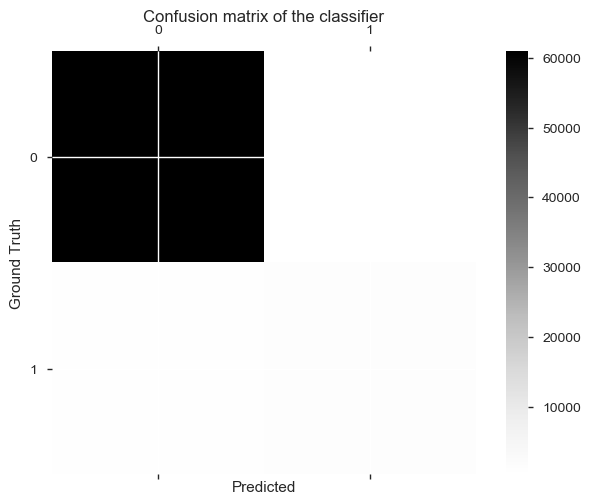

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.show()

### Interpret Model and Report Results

To explain the results of a randomforest prediction, we can look at a single tree in the forest and the feature importances of our explanatory variables.

### Visualizing a Single Decision Tree

In [16]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = forest.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

FileNotFoundError: [WinError 2] "dot.exe" not found in path.

This image can be downloaded and examined in greater detail. For this report, I will limit the depth of trees in the forest to produce an understandable image.

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestClassification(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

print('Here is the reduced size tree annotated with labels')
graph.write_png('small_tree.png')

Based solely on this tree, we can make a prediction for any new data point. Let’s take an example of making a prediction for Wednesday, December 27, 2017. The (actual) variables are: temp_2 = 39, temp_1 = 35, average = 44, and friend = 30. We start at the root node and the first answer is True because temp_1 ≤ 59.5. We move to the left and encounter the second question, which is also True as average ≤ 46.8. Move down to the left and on to the third and final question which is True as well because temp_1 ≤ 44.5. Therefore, we conclude that our estimate for the maximum temperature is 41.0 degrees as indicated by the value in the leaf node. An interesting observation is that in the root node, there are only 162 samples despite there being 261 training data points. This is because each tree in the forest is trained on a random subset of the data points with replacement (called bagging, short for bootstrap aggregating). (We can turn off the sampling with replacement and use all the data points by setting bootstrap = False when making the forest). Random sampling of data points, combined with random sampling of a subset of the features at each node of the tree, is why the model is called a ‘random’ forest.

Furthermore, notice that in our tree, there are only 2 variables we actually used to make a prediction! According to this particular decision tree, the rest of the features are not important for making a prediction. Month of the year, day of the month, and our friend’s prediction are utterly useless for predicting the maximum temperature tomorrow! The only important information according to our simple tree is the temperature 1 day prior and the historical average. Visualizing the tree has increased our domain knowledge of the problem, and we now know what data to look for if we are asked to make a prediction!

### Variable Importances
In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. The importances returned in Skicit-learn represent how much including a particular variable improves the prediction. 

At the top of the list is temp_1, the max temperature of the day before. This tells us the best predictor of the max temperature for a day is the max temperature of the day before, a rather intuitive finding. The second most important factor is the historical average max temperature, also not that surprising. Your friend turns out to not be very helpful, along with the day of the week, the year, the month, and the temperature 2 days prior. These importances all make sense as we would not expect the day of the week to be a predictor of maximum temperature as it has nothing to do with weather. Moreover, the year is the same for all data points and hence provides us with no information for predicting the max temperature.

In future implementations of the model, we can remove those variables that have no importance and the performance will not suffer. Additionally, if we are using a different model, say a support vector machine, we could use the random forest feature importances as a kind of feature selection method. Let’s quickly make a random forest with only the two most important variables, the max temperature 1 day prior and the historical average and see how the performance compares.

In [17]:
import pandas as pd
feature_importances = pd.DataFrame(forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)
feature_importances

,importance
total_pages_visited,0.814459
age,0.108482
country_China,0.024633
new_user_0,0.019516
new_user_1,0.015139
country_US,0.004036
country_UK,0.003982
country_Germany,0.002684
source_Direct,0.002489
source_Seo,0.002430


In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
This tells us that we actually do not need all the data we collected to make accurate predictions! 
If we were to continue using this model, we could only collect the two variables and achieve nearly the same performance. In a production setting, we would need to weigh the decrease in accuracy versus the extra time required to obtain more information. Knowing how to find the right balance between performance and cost is an essential skill for a machine learning engineer and will ultimately depend on the problem!

At this point we have covered pretty much everything there is to know for a basic implementation of the random forest for a supervised regression problem. We can feel confident that our model can predict the maximum temperature tomorrow with 94% accuracy from one year of historical data. From here, feel free to play around with this example, or use the model on a data set of your choice. I will wrap up this post by making a few visualizations. My two favorite parts of data science are graphing and modeling, so naturally I have to make some charts! In addition to being enjoyable to look at, charts can help us diagnose our model because they compress a lot of numbers into an image that we can quickly examine.

Visualizations
The first chart I’ll make is a simple bar plot of the feature importances to illustrate the disparities in the relative significance of the variables. Plotting in Python is kind of non-intuitive, and I end up looking up almost everything on Stack Overflow when I make graphs. Don’t worry if the code here doesn’t quite make sense, sometimes fully understanding the code isn’t necessary to get the end result you want!

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
Next, we can plot the entire dataset with predictions highlighted. This requires a little data manipulation, 
but its not too difficult. We can use this plot to determine if there are any outliers in either the data or our predictions.

In [ ]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

In [ ]:
A little bit of work for a nice looking graph! It doesn’t look as if we have any noticeable outliers that need to be corrected. To further diagnose the model, we can plot residuals (the errors) to see if our model has a tendency to over-predict or under-predict, and we can also see if the residuals are normally distributed. However, I will just make one final chart showing the actual values, the temperature one day previous, the historical average, and our friend’s prediction. This will allow us to see the difference between useful variables and those that aren’t so helpful.

In [ ]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
# Formatting plot
plt.legend(); plt.xticks(rotation = '60');
# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');

Actual Values and Variables
It is a little hard to make out all the lines, but we can see why the max temperature one day prior and the historical max temperature are useful for predicting max temperature while our friend is not (don’t give up on the friend yet, but maybe also don’t place so much weight on their estimate!). Graphs such as this are often helpful to make ahead of time so we can choose the variables to include, but they also can be used for diagnosis. Much as in the case of Anscombe’s quartet, graphs are often more revealing than quantitative numbers and should be a part of any machine learning workflow.

### Conclusions
With those graphs, we have completed an entire end-to-end machine learning example! At this point, if we want to improve our model, we could try different hyperparameters (settings) try a different algorithm, or the best approach of all, gather more data! The performance of any model is directly proportional to the amount of valid data it can learn from, and we were using a very limited amount of information for training. I would encourage anyone to try and improve this model and share the results. From here you can dig more into the random forest theory and application using numerous online (free) resources. For those looking for a single book to cover both theory and Python implementations of machine learning models, I highly recommend Hands-On Machine Learning with Scikit-Learn and Tensorflow. Moreover, I hope everyone who made it through has seen how accessible machine learning has become and is ready to join the welcoming and helpful machine learning community.